# Stats700-002 Homework 4, Fall 2017
### Zhen Qin
#### qinzhen@umich.edu

I did not discuss problems with anyone. This file uses python 3.6.

Problem 1 took me one hour; Problem 2 took me four hours; Problem 3 took me two hours.

### Problem 1: Warmup: Constructing a 3-tensor

1.

Create a TensorFlow constant tensor tflogo with shape 5-by-4-by-3. As a sanity check, try printing the tensor.

In [31]:
import tensorflow as tf
import numpy as np

logo = np.zeros([5, 4, 3])
logo[:,2,2] = 1
logo[0,:,2] = 1
logo[0,3,:] = 1
logo[2,2,1] = 1

sess = tf.Session()
tflogo = tf.constant(logo, dtype = tf.int16)

print(tflogo.eval(session=sess))

sess.close()

[[[0 0 1]
  [0 0 1]
  [0 0 1]
  [1 1 1]]

 [[0 0 0]
  [0 0 0]
  [0 0 1]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 1 1]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 1]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 1]
  [0 0 0]]]


### Problem 2: Building and training simple models

1.

Logistic regression with a negative log-likelihood loss. Suppose parameter $p = \sigma (W^T x +b)$, then $p(y=1|x,W,b)=p$, $p(y=0|x,W,b)=1-p$, i.e. $p(y|x,W,b)=p^y(1-p)^{1-y}$. Then the likelihood is $p(\mathbf{y}|\mathbf{x},\mathbf{W},\mathbf{b})\sim \prod_{i}^{N} (\sigma (W^T x_i +b))^{y_i}(1-\sigma (W^T x_i +b))^{1-y_i}$, and the negative log likelihood is $L(W, b)=-(\sum_i^N y_i \log \sigma (W^T x_i +b)+(1-y_i) \log (1-\sigma (W^T x_i +b))$.

In [1]:
import tensorflow as tf
import numpy as np

In [2]:
x = tf.placeholder(tf.float32,[None,6])
ytrue = tf.placeholder(tf.float32, [None,1])
W = tf.Variable(tf.zeros([6,1]))
b = tf.Variable(tf.zeros([1]))
f = tf.matmul(x,W) + b
par = tf.sigmoid(f)
like = ytrue * tf.log(par) + (1 - ytrue) * tf.log(1 - par)
loss = - tf.reduce_sum(like)

2.

Estimating parameters in logistic regression. Try printing the training data loss before and after optimization. The loss function decreases after optimization. Estimates of W and b are shown below.

In [3]:
logit_xtrain = np.load('logistic_xtrain.npy')
logit_ytrain = np.load('logistic_ytrain.npy')
logit_xtest = np.load('logistic_xtest.npy')
logit_ytest = np.load('logistic_ytest.npy')

In [4]:
train_step = tf.train.GradientDescentOptimizer(0.005).minimize(loss)
sess = tf.InteractiveSession()
tf.global_variables_initializer().run()
sess.run(loss, feed_dict={x: logit_xtrain, ytrue: logit_ytrain})

1386.2919

In [5]:
for _ in range(5000):
    sess.run(train_step, feed_dict={x: logit_xtrain, ytrue: logit_ytrain})
print(W.eval(session=sess))
print(b.eval(session=sess))

[[ 1.01455295]
 [ 0.79892522]
 [ 2.16193056]
 [ 2.86751294]
 [ 4.64128637]
 [ 7.64388895]]
[-0.84374028]


In [6]:
sess.run(loss, feed_dict={x: logit_xtrain, ytrue: logit_ytrain})

674.31427

3.

Evaluating logistic regression on test data. The negative log-likelihood of the model on this test data is shown below.

In [7]:
sess.run(loss, feed_dict={x: logit_xtest, ytrue: logit_ytest})

161.88013

4.

Evaluating the estimated logistic parameters. The squared error is shown below.

In [8]:
Wtrue = tf.constant([1,1,2,3,5,8], dtype=tf.float32)
btrue = tf.constant(-1, dtype=tf.float32)
Wse = (tf.reshape(W,[6])-Wtrue)**2
bse = (b-btrue)**2
print(Wse.eval(session = sess))
print(bse.eval(session = sess))

[ 0.00021179  0.04043107  0.02622151  0.01755282  0.12867546  0.12681508]
[ 0.0244171]


In [9]:
sess.close()

5.

Probit regression with negative log-likelihood loss. Suppose parameter $p = \Phi (W^T x )$, then $p(y=1|x,W)=p$, $p(y=0|x,W)=1-p$, i.e. $p(y|x,W)=p^y(1-p)^{1-y}$. Then the likelihood is $p(\mathbf{y}|\mathbf{x},\mathbf{W})\sim \prod_{i}^{N} (\Phi (W^T x_i ))^{y_i}(1-\Phi (W^T x_i ))^{1-y_i}$, and the negative log likelihood is $L(W)=-(\sum_i^N y_i \log \Phi (W^T x_i )+(1-y_i) \log (1-\Phi (W^T x_i ))$.

In [10]:
dist = tf.distributions.Normal(loc=0., scale=1.)
x = tf.placeholder(tf.float32,[None,5])
ytrue = tf.placeholder(tf.float32, [None,1])
W = tf.Variable(tf.zeros([5,1]))
f = tf.matmul(x,W)
par = dist.cdf(f)
like = ytrue * tf.log(par) + (1 - ytrue) * tf.log(1 - par)
loss = - tf.reduce_sum(like)

6.

Estimating parameters in probit regression. Try printing the training data loss before and after optimization. The loss function decreases after optimization. Estimates of W are shown below.

In [11]:
pr_xtrain = np.load('probit_xtrain.npy')
pr_xtest = np.load('probit_xtest.npy')
pr_ytrain = np.load('probit_ytrain.npy')
pr_ytest = np.load('probit_ytest.npy')

In [12]:
train_step = tf.train.AdagradOptimizer(0.1).minimize(loss)
sess = tf.InteractiveSession()
tf.global_variables_initializer().run()
sess.run(loss, feed_dict={x: pr_xtrain, ytrue: pr_ytrain})

6931.4233

In [13]:
for _ in range(5000):
    sess.run(train_step, feed_dict={x: pr_xtrain, ytrue: pr_ytrain})
print(W.eval(session=sess))

[[ 0.95452106]
 [-1.41738951]
 [ 2.52160692]
 [-3.4898448 ]
 [ 5.53321171]]


In [14]:
sess.run(loss, feed_dict={x: pr_xtrain, ytrue: pr_ytrain})

4934.7822

7.

Evaluating probit regression on test data. The negative log-likelihood of the model on this test data is shown below.

In [15]:
sess.run(loss, feed_dict={x: pr_xtest, ytrue: pr_ytest})

242.63412

8.

Evaluating the estimated probit parameter. The squared error is shown below.

In [16]:
Wtrue = tf.constant([1,-1.5,2.5,-3.5,5.5], dtype=tf.float32)
se = (tf.reshape(W,[5])-Wtrue)**2
print(se.eval(session = sess))

[ 0.00206833  0.00682449  0.00046686  0.00010313  0.00110302]


In [17]:
sess.close()

### Problem 3: Building a Complicated Model

I choose the topic Vector Representations of Words. Set nsteps = 100001.

In [24]:
from __future__ import absolute_import
from __future__ import division
from __future__ import print_function

import collections
import math
import os
import random
from tempfile import gettempdir
import zipfile

import numpy as np
from six.moves import urllib
from six.moves import xrange  # pylint: disable=redefined-builtin
import tensorflow as tf

# Step 1: Download the data.
url = 'http://mattmahoney.net/dc/'


# pylint: disable=redefined-outer-name
def maybe_download(filename, expected_bytes):
    local_filename = os.path.join(gettempdir(), filename)
    if not os.path.exists(local_filename):
        local_filename, _ = urllib.request.urlretrieve(url + filename, local_filename)
    statinfo = os.stat(local_filename)
    if statinfo.st_size == expected_bytes:
        print('Found and verified', filename)
    else:
        print(statinfo.st_size)
        raise Exception('Failed to verify ' + local_filename + '. Can you get to it with a browser?')
    return local_filename


filename = maybe_download('text8.zip', 31344016)


# Read the data into a list of strings.
def read_data(filename):
    with zipfile.ZipFile(filename) as f:
        data = tf.compat.as_str(f.read(f.namelist()[0])).split()
    return data

vocabulary = read_data(filename)
print('Data size', len(vocabulary))

# Step 2: Build the dictionary and replace rare words with UNK token.
vocabulary_size = 50000


def build_dataset(words, n_words):
    count = [['UNK', -1]]
    count.extend(collections.Counter(words).most_common(n_words - 1))
    dictionary = dict()
    for word, _ in count:
        dictionary[word] = len(dictionary)
    data = list()
    unk_count = 0
    for word in words:
        index = dictionary.get(word, 0)
        if index == 0:  # dictionary['UNK']
            unk_count += 1
        data.append(index)
    count[0][1] = unk_count
    reversed_dictionary = dict(zip(dictionary.values(), dictionary.keys()))
    return data, count, dictionary, reversed_dictionary

# Filling 4 global variables:
# data - list of codes (integers from 0 to vocabulary_size-1).
#   This is the original text but words are replaced by their codes
# count - map of words(strings) to count of occurrences
# dictionary - map of words(strings) to their codes(integers)
# reverse_dictionary - maps codes(integers) to words(strings)
data, count, dictionary, reverse_dictionary = build_dataset(vocabulary,
                                                            vocabulary_size)
del vocabulary  # Hint to reduce memory.
print('Most common words (+UNK)', count[:5])
print('Sample data', data[:10], [reverse_dictionary[i] for i in data[:10]])

data_index = 0

# Step 3: Function to generate a training batch for the skip-gram model.
def generate_batch(batch_size, num_skips, skip_window):
    global data_index
    assert batch_size % num_skips == 0
    assert num_skips <= 2 * skip_window
    batch = np.ndarray(shape=(batch_size), dtype=np.int32)
    labels = np.ndarray(shape=(batch_size, 1), dtype=np.int32)
    span = 2 * skip_window + 1  # [ skip_window target skip_window ]
    buffer = collections.deque(maxlen=span)
    if data_index + span > len(data):
        data_index = 0
    buffer.extend(data[data_index:data_index + span])
    data_index += span
    for i in range(batch_size // num_skips):
        context_words = [w for w in range(span) if w != skip_window]
        words_to_use = random.sample(context_words, num_skips)
        for j, context_word in enumerate(words_to_use):
            batch[i * num_skips + j] = buffer[skip_window]
            labels[i * num_skips + j, 0] = buffer[context_word]
        if data_index == len(data):
            buffer[:] = data[:span]
            data_index = span
        else:
            buffer.append(data[data_index])
            data_index += 1
  # Backtrack a little bit to avoid skipping words in the end of a batch
    data_index = (data_index + len(data) - span) % len(data)
    return batch, labels

batch, labels = generate_batch(batch_size=8, num_skips=2, skip_window=1)
for i in range(8):
    print(batch[i], reverse_dictionary[batch[i]],'->', labels[i, 0], reverse_dictionary[labels[i, 0]])

# Step 4: Build and train a skip-gram model.

batch_size = 128
embedding_size = 128  # Dimension of the embedding vector.
skip_window = 1       # How many words to consider left and right.
num_skips = 2         # How many times to reuse an input to generate a label.
num_sampled = 64      # Number of negative examples to sample.

# We pick a random validation set to sample nearest neighbors. Here we limit the
# validation samples to the words that have a low numeric ID, which by
# construction are also the most frequent. These 3 variables are used only for
# displaying model accuracy, they don't affect calculation.
valid_size = 16     # Random set of words to evaluate similarity on.
valid_window = 100  # Only pick dev samples in the head of the distribution.
valid_examples = np.random.choice(valid_window, valid_size, replace=False)


graph = tf.Graph()

with graph.as_default():

  # Input data.
    train_inputs = tf.placeholder(tf.int32, shape=[batch_size])
    train_labels = tf.placeholder(tf.int32, shape=[batch_size, 1])
    valid_dataset = tf.constant(valid_examples, dtype=tf.int32)

  # Ops and variables pinned to the CPU because of missing GPU implementation
    with tf.device('/cpu:0'):
    # Look up embeddings for inputs.
        embeddings = tf.Variable(tf.random_uniform([vocabulary_size, embedding_size], -1.0, 1.0))
        embed = tf.nn.embedding_lookup(embeddings, train_inputs)

    # Construct the variables for the NCE loss
        nce_weights = tf.Variable(tf.truncated_normal([vocabulary_size, embedding_size],stddev=1.0 / math.sqrt(embedding_size)))
        nce_biases = tf.Variable(tf.zeros([vocabulary_size]))

  # Compute the average NCE loss for the batch.
  # tf.nce_loss automatically draws a new sample of the negative labels each
  # time we evaluate the loss.
  # Explanation of the meaning of NCE loss:
  #   http://mccormickml.com/2016/04/19/word2vec-tutorial-the-skip-gram-model/
    loss = tf.reduce_mean(
        tf.nn.nce_loss(weights=nce_weights,
                     biases=nce_biases,
                     labels=train_labels,
                     inputs=embed,
                     num_sampled=num_sampled,
                     num_classes=vocabulary_size))

  # Construct the SGD optimizer using a learning rate of 1.0.
    optimizer = tf.train.GradientDescentOptimizer(1.0).minimize(loss)

  # Compute the cosine similarity between minibatch examples and all embeddings.
    norm = tf.sqrt(tf.reduce_sum(tf.square(embeddings), 1, keep_dims=True))
    normalized_embeddings = embeddings / norm
    valid_embeddings = tf.nn.embedding_lookup(normalized_embeddings, valid_dataset)
    similarity = tf.matmul(valid_embeddings, normalized_embeddings, transpose_b=True)

  # Add variable initializer.
    init = tf.global_variables_initializer()

# Step 5: Begin training.
nsteps = 100001

with tf.Session(graph=graph) as session:
  # We must initialize all variables before we use them.
    init.run()
    print('Initialized')

    average_loss = 0
    for step in xrange(nsteps):
        batch_inputs, batch_labels = generate_batch(batch_size, num_skips, skip_window)
        feed_dict = {train_inputs: batch_inputs, train_labels: batch_labels}

    # We perform one update step by evaluating the optimizer op (including it
    # in the list of returned values for session.run()
        _, loss_val = session.run([optimizer, loss], feed_dict=feed_dict)
        average_loss += loss_val
   
        if step % 2000 == 0:
            if step > 0:
                average_loss /= 2000
      # The average loss is an estimate of the loss over the last 2000 batches.
            print('Average loss at step ', step, ': ', average_loss)
            average_loss = 0

    # Note that this is expensive (~20% slowdown if computed every 500 steps)
        if step % 10000 == 0:
            sim = similarity.eval()
            for i in xrange(valid_size):
                valid_word = reverse_dictionary[valid_examples[i]]
                top_k = 8  # number of nearest neighbors
                nearest = (-sim[i, :]).argsort()[1:top_k + 1]
                log_str = 'Nearest to %s:' % valid_word
                for k in xrange(top_k):
                    close_word = reverse_dictionary[nearest[k]]
                    log_str = '%s %s,' % (log_str, close_word)
                print(log_str)
    final_embeddings = normalized_embeddings.eval()

Found and verified text8.zip
Data size 17005207
Most common words (+UNK) [['UNK', 418391], ('the', 1061396), ('of', 593677), ('and', 416629), ('one', 411764)]
Sample data [5234, 3081, 12, 6, 195, 2, 3134, 46, 59, 156] ['anarchism', 'originated', 'as', 'a', 'term', 'of', 'abuse', 'first', 'used', 'against']
3081 originated -> 12 as
3081 originated -> 5234 anarchism
12 as -> 6 a
12 as -> 3081 originated
6 a -> 12 as
6 a -> 195 term
195 term -> 2 of
195 term -> 6 a
Initialized
Average loss at step  0 :  266.843566895
Nearest to and: mirrored, aegeus, oecs, dispositions, maps, precipitates, accrued, cult,
Nearest to often: gylfaginning, frick, harvey, platform, precludes, eutelsat, prostitution, melon,
Nearest to b: delphinus, lucretius, smoothing, irregularities, mink, antagonists, pictorial, enacted,
Nearest to three: timeframe, strenuous, warbler, subplot, randomization, caliphs, germania, backtracking,
Nearest to united: discuss, alpher, crab, socks, networking, helmet, cz, races,
Near

Average loss at step  52000 :  5.06041232729
Average loss at step  54000 :  5.17336465251
Average loss at step  56000 :  5.02330566585
Average loss at step  58000 :  5.04389646816
Average loss at step  60000 :  4.93589376664
Nearest to and: or, dasyprocta, ursus, circ, but, albury, michelob, solf,
Nearest to often: also, which, not, usually, agouti, mesa, simons, thibetanus,
Nearest to b: d, antagonists, advancing, circ, martin, ursus, lucretius, leftrightarrow,
Nearest to three: four, six, five, two, eight, seven, ursus, one,
Nearest to united: rang, following, at, albury, discuss, during, helmet, dasyprocta,
Nearest to all: these, kinds, wesleyan, each, ursus, dasyprocta, some, mos,
Nearest to its: their, his, the, ursus, dasyprocta, circ, her, operatorname,
Nearest to may: would, can, will, might, could, csu, cannot, should,
Nearest to a: ursus, the, wct, agouti, arctos, aquarius, gigantopithecus, dasyprocta,
Nearest to while: when, if, although, and, pathway, abet, where, as,
Neare

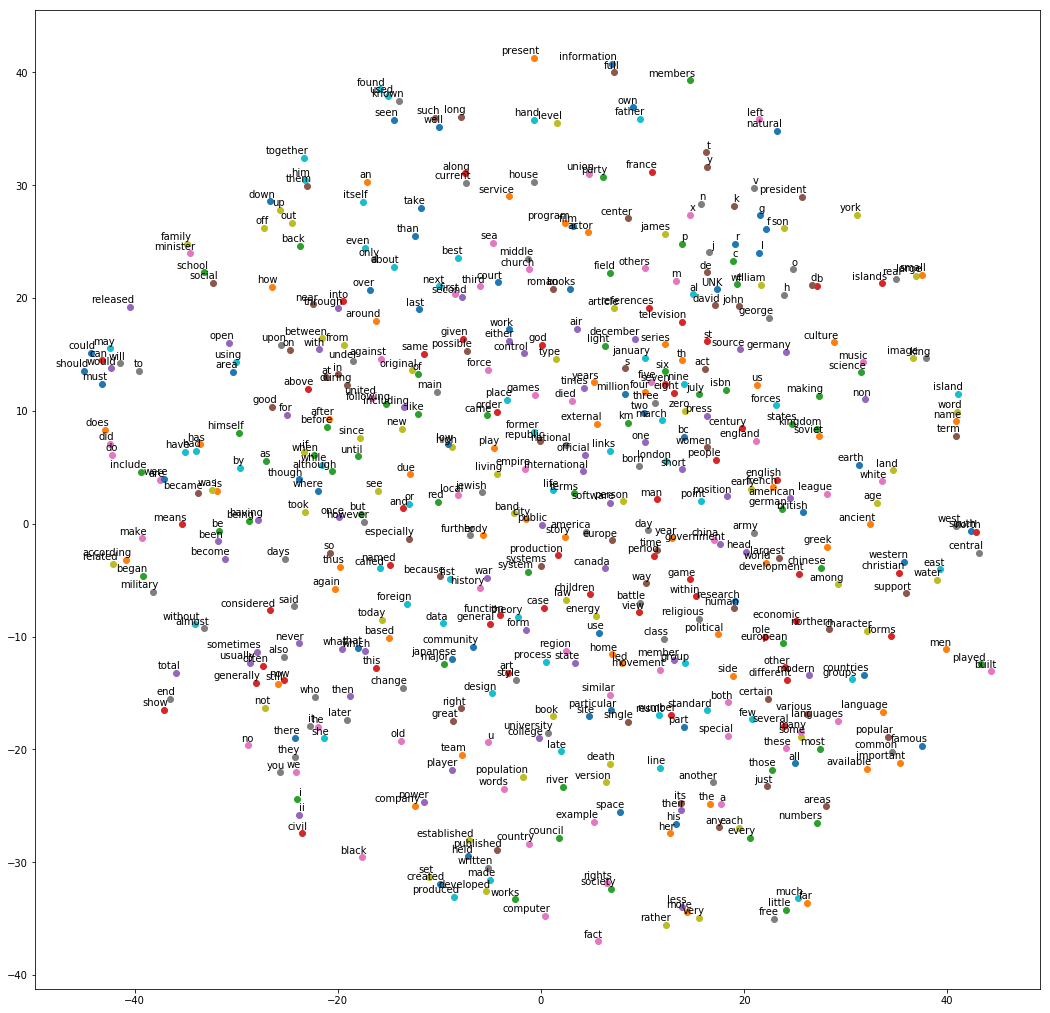

In [25]:
# Step 6: Visualize the embeddings.


# pylint: disable=missing-docstring
# Function to draw visualization of distance between embeddings.
def plot_with_labels(low_dim_embs, labels):
    assert low_dim_embs.shape[0] >= len(labels), 'More labels than embeddings'
    plt.figure(figsize=(18, 18))  # in inches
    for i, label in enumerate(labels):
        x, y = low_dim_embs[i, :]
        plt.scatter(x, y)
        plt.annotate(label,
                 xy=(x, y),
                 xytext=(5, 2),
                 textcoords='offset points',
                 ha='right',
                 va='bottom')

    _ = plt.show()

%matplotlib inline
try:
  # pylint: disable=g-import-not-at-top
    from sklearn.manifold import TSNE
    import matplotlib.pyplot as plt

    tsne = TSNE(perplexity=30, n_components=2, init='pca', n_iter=5000, method='exact')
    plot_only = 500
    low_dim_embs = tsne.fit_transform(final_embeddings[:plot_only, :])
    labels = [reverse_dictionary[i] for i in xrange(plot_only)]
    plot_with_labels(low_dim_embs, labels)

except ImportError as ex:
    print('Please install sklearn, matplotlib, and scipy to show embeddings.')
    print(ex)